In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
# Missing value treatment

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count per jon title')

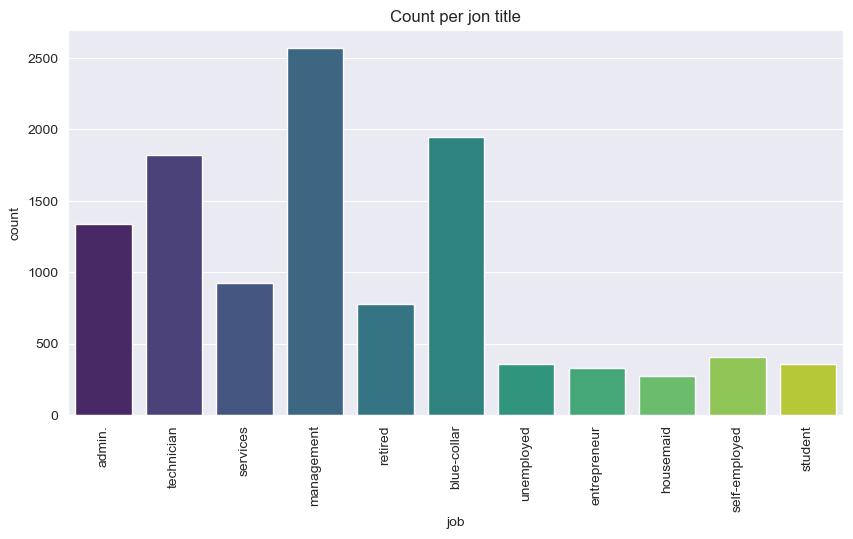

In [21]:
# Count of each job title

sns.countplot("job", data = df, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Count per jon title")

In [19]:
# Droping the rows that are saved as unknown

df.loc[df["job"] == "unknown"]["job"].count()

0

In [18]:
df.drop(df[df["job"]=="unknown"].index,axis = 0, inplace = True)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [23]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of each matital status')

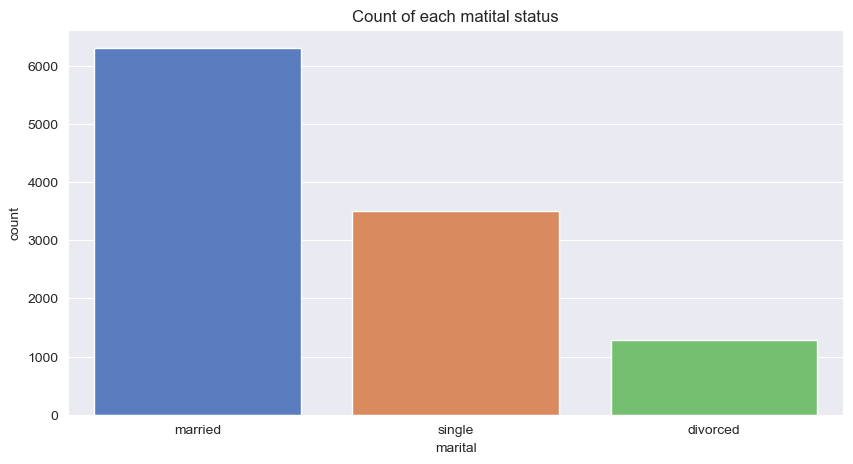

In [25]:
# Count of each marital status

sns.countplot("marital", data = df, palette = "muted")

plt.title("Count of each matital status")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


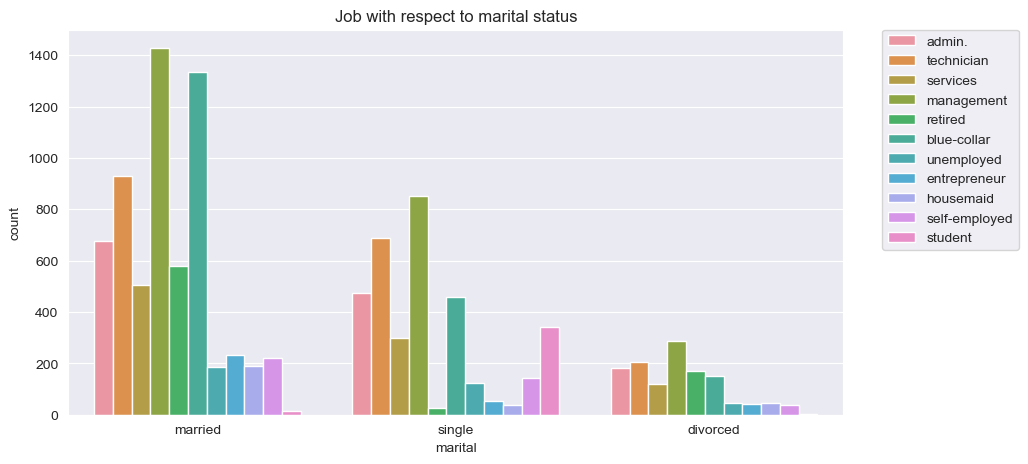

In [28]:
# Job with respect to marital status

sns.countplot("marital", data = df, hue = "job")
plt.title("Job with respect to marital status")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
# Count of education type

education = df["education"].value_counts()

In [30]:
education

secondary    5461
tertiary     3680
primary      1493
unknown       458
Name: education, dtype: int64

([<matplotlib.patches.Wedge at 0x1a2ba7cf340>,
 [Text(0.02647952676868341, 1.0996812422980156, 'secondary'),
  Text(-0.6542698124613789, -1.0059478179815056, 'tertiary'),
  Text(0.9313476396995439, -0.7566978089211628, 'primary'),
  Text(1.1899178572672573, -0.15522723007416955, 'unknown')],
 [Text(0.014443378237463675, 0.5998261321625539, '49.23%'),
  Text(-0.38165739060247106, -0.5868028938225448, '33.18%'),
  Text(0.5432861231580672, -0.44140705520401163, '13.46%'),
  Text(0.6941187500725666, -0.09054921754326557, '4.13%')])

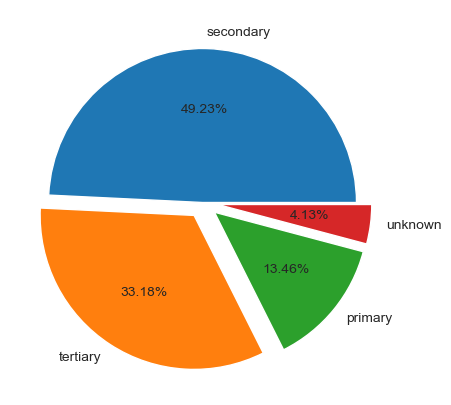

In [33]:
plt.pie(education,labels = education.index, autopct="%.2f%%", explode = [0,0.1,0.1,0.1])

<AxesSubplot:xlabel='education', ylabel='count'>

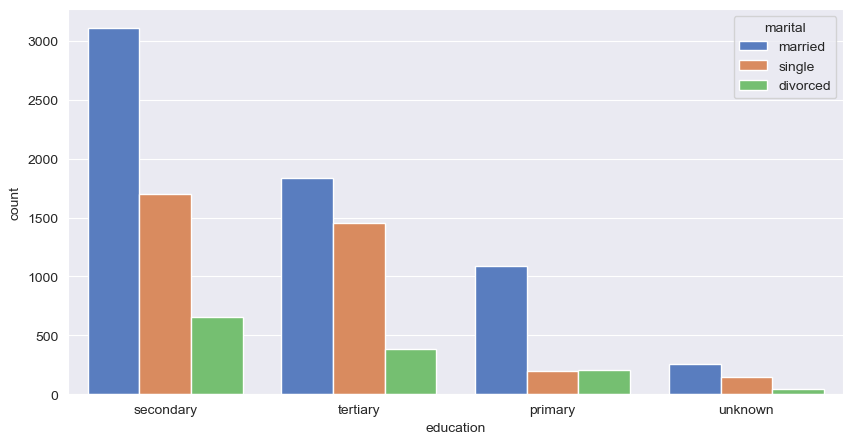

In [38]:
# Education with respect to marital status

sns.countplot("education", data = df, hue = "marital", palette = "muted")

<AxesSubplot:xlabel='age', ylabel='Count'>

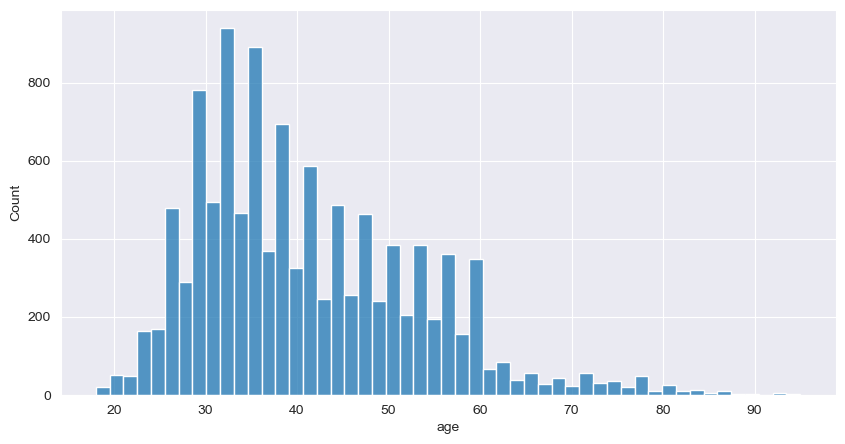

In [36]:
# Age distribution

sns.histplot(df["age"])

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Job and Default')

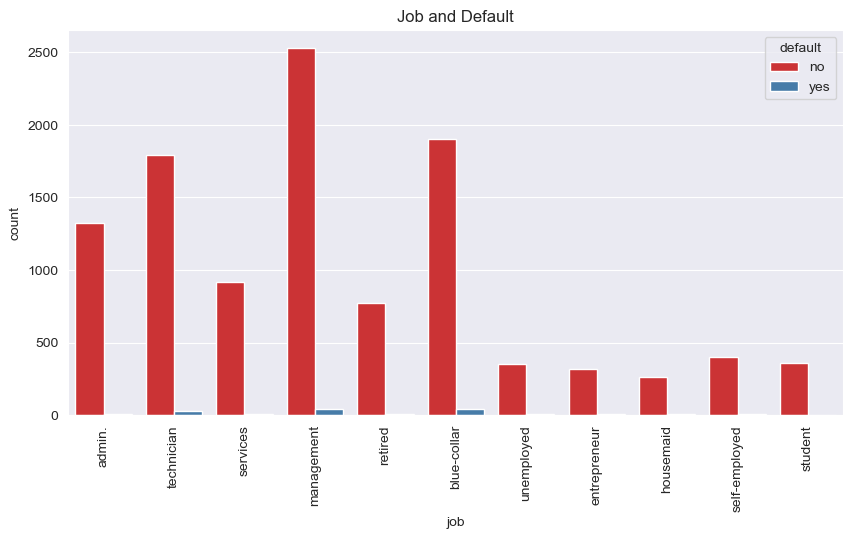

In [42]:
# Job and Defaulter analysis

sns.countplot("job", data = df, hue = "default", palette = "Set1")
plt.xticks(rotation = 90)
plt.title("Job and Default")

In [48]:
# Correlation between elements

correlation = df.corr()

In [49]:
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.111255,0.000746,0.000635,-0.005722,0.002572,0.020386
balance,0.111255,1.000000,0.009914,0.022187,-0.014836,0.017893,0.031464
day,0.000746,0.009914,1.000000,-0.017971,0.136007,-0.076278,-0.058574
duration,0.000635,0.022187,-0.017971,1.000000,-0.041160,-0.029448,-0.027562
campaign,-0.005722,-0.014836,0.136007,-0.041160,1.000000,-0.102041,-0.049019
pdays,0.002572,0.017893,-0.076278,-0.029448,-0.102041,1.000000,0.507111
previous,0.020386,0.031464,-0.058574,-0.027562,-0.049019,0.507111,1.000000


<AxesSubplot:>

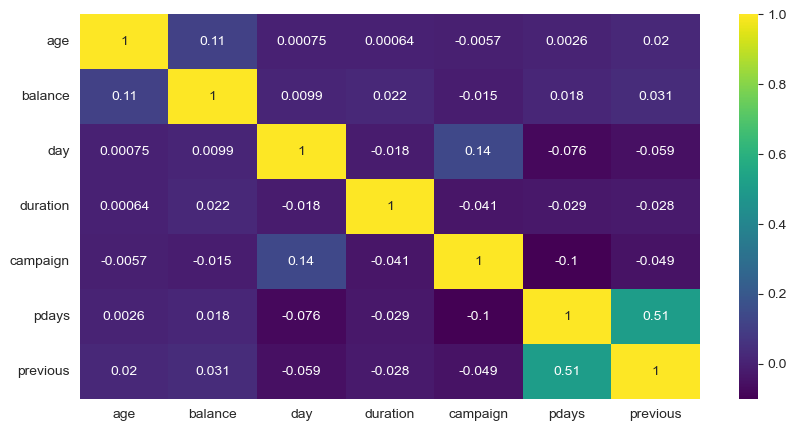

In [50]:
sns.heatmap(correlation, annot = True, cmap = "viridis")

In [51]:
# Month wise activities

activity = df["month"].value_counts()

In [52]:
activity

may    2819
jul    1504
aug    1502
jun    1214
nov     939
apr     917
feb     771
oct     386
jan     339
sep     316
mar     275
dec     110
Name: month, dtype: int64

Text(0, 0.5, 'Count')

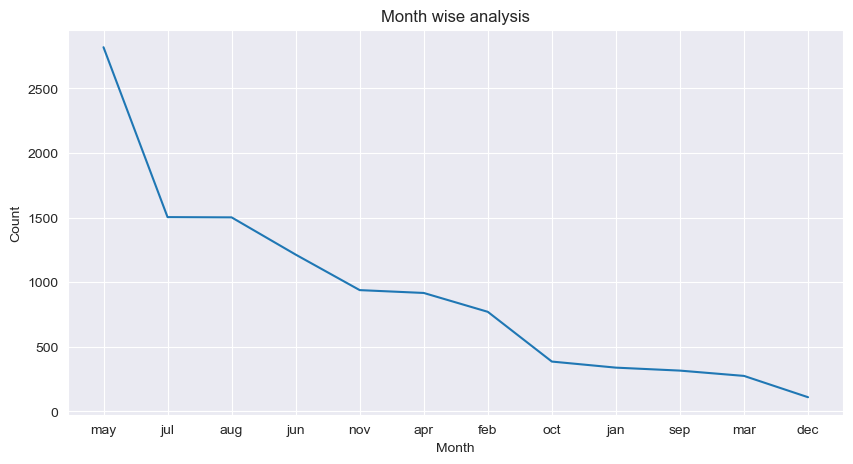

In [59]:
sns.lineplot(x = activity.index, y = activity.values)
plt.title("Month wise analysis")
plt.xlabel("Month")
plt.ylabel("Count")

In [55]:
df["campaign"].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

Text(0.5, 1.0, 'Month wise campaign count')

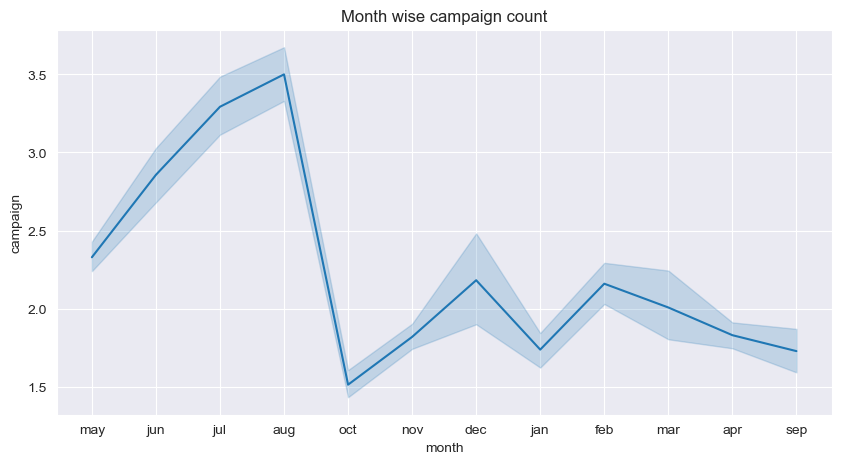

In [61]:
sns.lineplot(x = df["month"], y = df["campaign"])
plt.title("Month wise campaign count")

In [62]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Customer age whose age are higher than the average age

In [71]:
avg_age = round(df["age"].mean(),2)

In [72]:
avg_age

41.2

In [73]:
df[df["age"] > avg_age]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,44,unemployed,married,secondary,no,0,no,no,cellular,21,nov,175,4,-1,0,unknown,no
11149,46,entrepreneur,married,secondary,no,3317,no,no,cellular,19,nov,231,2,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no


In [76]:
# Average age per job

job_age = round(df.groupby("job")["age"].mean(),0)

In [77]:
job_age

job
admin.           39.0
blue-collar      40.0
entrepreneur     43.0
housemaid        47.0
management       40.0
retired          65.0
self-employed    40.0
services         38.0
student          26.0
technician       39.0
unemployed       41.0
Name: age, dtype: float64

Text(0.5, 1.0, 'Average Age per Job')

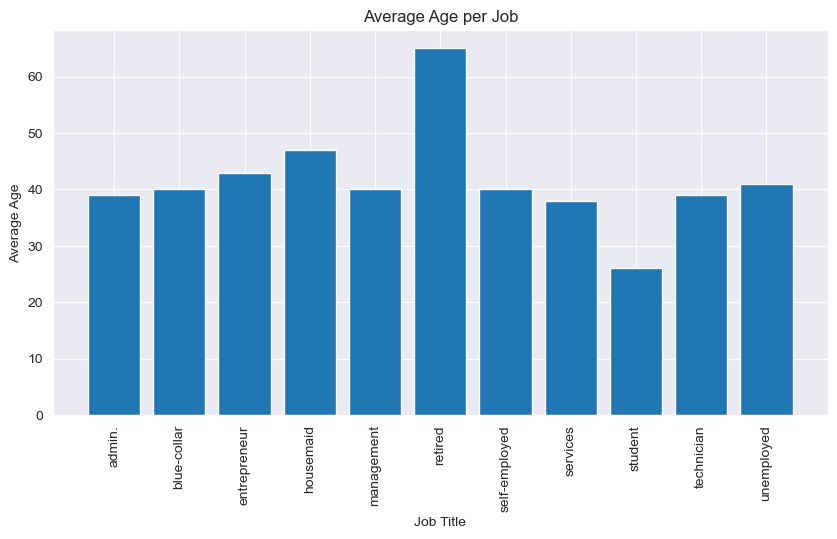

In [82]:
plt.bar(job_age.index,job_age.values)
plt.xticks(rotation = 90)
plt.xlabel("Job Title")
plt.ylabel("Average Age")
plt.title("Average Age per Job")